Psuedocode: 
Create a matrix of length of T/delta T by L/delta X
define a c

we have the initial 


In [1]:
R = 2 #length
T = 1 #Total Time
delta_t = .01 #Timestep
c = 1 #Wavespeed
     
delta_r = .01 #Spatial step
ntsteps = T/delta_t #number of time steps
nrsteps = R/delta_r #number of segments of string
using Plots
using FFTW

In [10]:
gamma = 1.2
#Initial Radius
r = zeros(Int(nrsteps)+2, 1)
r[1]= -1*delta_r
for i = 1:size(r,1)-1
    r[i+1]=r[i]+delta_r
end

#Time
t=zeros(Int(ntsteps)+1,1)
t[1]=0
for i = 1:Int(ntsteps)
    t[i+1]=t[i]+delta_t
end

#Equilibrium Quantities

#Equilibrium density
rho_0 = zeros(Int(nrsteps)+2,1)
for i = 1:Int(nrsteps)+2
    rho_0[i] = 10*sin(pi*r[i]/R)/(r[i]/R)
end
rho_0[Int(size(rho_0,1))]=-rho_0[Int(size(rho_0,1)-1)]

#Equilibrium pressure
p_0 = zeros(Int(nrsteps)+2,1)
for i = 1:Int(nrsteps)+2
    p_0[i] = rho_0[i]^2
end

#Mass calculation
M = zeros(Int(nrsteps)+2,1)
M[1] = 0
for i = 3:Int(nrsteps)+1
    M[i+1]=M[i] + (4/3)*pi*(delta_r^3)*rho_0[i]
end

#Equilibrium Gravity
g_0 = zeros(Int(nrsteps)+2)
for i=1:Int(nrsteps)+2
    g_0[i]=M[i]/(r[i]^2)
end


#Zeta_r for normal intervals
Z_r = zeros(Int(nrsteps)+2,Int(ntsteps)+2)
for i=1:Int(nrsteps)+2
    Z_r[i,1:2].=.04*sin(25*pi*r[i])
end

#Initializing the perturbed quantities
rho_prime = zeros(Int(nrsteps)+1,Int(ntsteps)+2)
p_prime = zeros(Int(nrsteps)+1,Int(ntsteps)+2)
dp_prime_dr  = zeros(Int(nrsteps)+1,Int(ntsteps)+2)


#Actual Z calculations
for j = 1:Int(ntsteps)

    #rho_prime calculation
    for i = 1:Int(nrsteps)+1
        rho_prime[i,j+1] = (-1/((r[Int(i+1)]^2)*delta_r))*(((r[Int(i+1)]^2)*rho_0[Int(i+1)]*Z_r[Int(i+1),j])-(r[i]^2)*rho_0[i]*Z_r[i,j])
    end
    
   #pprime calculation
    for i = 1:Int(nrsteps)+1
        p_prime[i,j] = gamma*p_0[i]/rho_0[i] * rho_prime[i,j]
    end
    
    #dP/dR at normal i
    for i = 1:Int(nrsteps)
        dp_prime_dr[i,j] = (p_prime[i+1,j]-p_prime[i,j])/delta_r
    end
    
    #d^2Z/dt^2
    Z_r[size(Z_r,1),j+2]=delta_r*(Z_r[Int(size(Z_r,1)-1),j+2]-(2/r[Int(size(Z_r,1)-1)])*Z_r[Int(size(Z_r,1)-1),j+2])
    for i = 1:Int(nrsteps+1)
         Z_r[i,j+2] = (2*Z_r[i,j+1]-Z_r[i,j]+(delta_t^2)*(dp_prime_dr[i]-rho_prime[i,j+1]*g_0[i]))/rho_0[i] 
    end
    #Boundary Condition at surface for Z_r
    Z_r[size(Z_r,1),j+2]=delta_r*(Z_r[Int(size(Z_r,1)-1),j+2]-(2/r[Int(size(Z_r,1)-1)])*Z_r[Int(size(Z_r,1)-1),j+2])
end


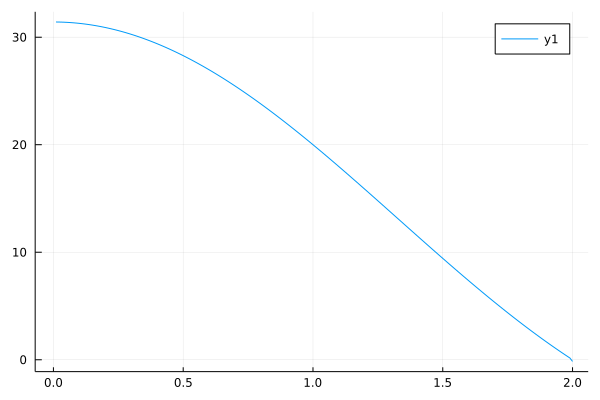

In [11]:
plot(r,rho_0)

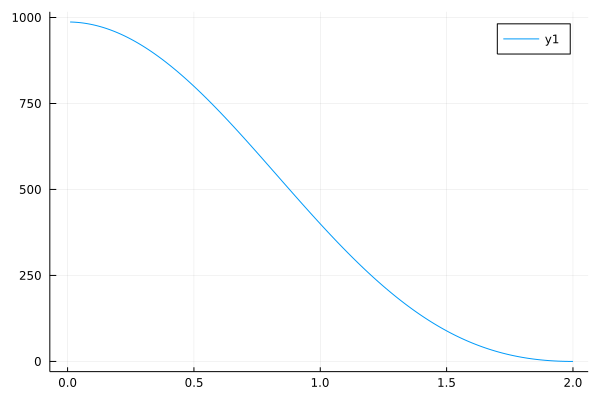

In [12]:
plot(r,p_0)

In [14]:
Z_r

202×102 Matrix{Float64}:
 -0.0282843    -0.0282843    NaN            …  NaN            NaN
  0.0           0.0          NaN               NaN            NaN
  0.0282843     0.0282843      0.000900353       1.95678e-76    2.40915e-77
  0.04          0.04           0.00130799        4.47384e-76   -1.17416e-76
  0.0282843     0.0282843      0.000854129      -9.67122e-76   -4.69462e-77
  4.89859e-18   4.89859e-18   -6.97494e-5   …   -1.52349e-76    5.62626e-77
 -0.0282843    -0.0282843     -0.000944056       5.33083e-76    5.92528e-77
 -0.04         -0.04          -0.00127308        3.94231e-76    4.59638e-78
 -0.0282843    -0.0282843     -0.00086726       -1.30347e-76   -4.56317e-77
 -9.79717e-18  -9.79717e-18    4.06481e-5       -4.6631e-76    -5.42102e-77
  0.0282843     0.0282843      0.00092547   …   -3.66315e-76   -2.02308e-77
  0.04          0.04           0.00127282        3.50834e-77    2.911e-77
  0.0282843     0.0282843      0.000879005       4.06757e-76    5.89338e-77
  ⋮      